**Assignment 2**

Name: Akshay Kumar

Roll No: cs23mtech11022

# Problem 1: Convolution function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def convolution(image, kernel, stride, padding, activation_function):
    """
    This function performs convolution operation on an image.

    Parameters:
    - image: Input image
    - kernal: The kernal used to perform convolution.
    - stride: Stride of the convolution operation.
    - padding: padding to be used on the input.
    - activation_function: takes activation function that is used during convolution operation.

    Returns:
    - output_activation: returns output activation after conolution operation.
    """

    # Adding padding if the value of padding is gerater then zero.
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

    # Finding the dimensions of the input image and kernal.
    input_height, input_width, input_channels = image.shape
    kernel_height, kernel_width, kernel_channels = kernel.shape

    # Calculating the dimensions of the output activation using formulas.
    output_height = ((input_height - kernel_height + 2*padding) // stride) + 1
    output_width = ((input_width - kernel_width + 2*padding) // stride) + 1

    # Inititializing the output activation of required height and width.
    output_activation = np.zeros((output_height, output_width))

    # Convolution
    for y in range(0, input_height - kernel_height + 1, stride):
        for x in range(0, input_width - kernel_width + 1, stride):
            for c in range(kernel_channels):
                # Extracting the region from the image
                region = image[y:y+kernel_height, x:x+kernel_width, c]
                # Element wise multiplication between the region and kernel
                elementwise_multiplication = region * kernel[:, :, c]
                # summing the elementwise multiplication and adding the
                # result to the corresponding location in the output_activation.
                output_activation[y//stride, x//stride] += np.sum(elementwise_multiplication)

    # Appling activation function after convolution operation.
    if activation_function == 'sigmoid':
        output_activation = 1 / (1 + np.exp(-output_activation))
    elif activation_function == 'tanh':
        output_activation = np.tanh(output_activation)
    elif activation_function == 'relu':
        output_activation = np.maximum(0, output_activation)
    elif activation_function == 'leaky_relu':
        output_activation = np.maximum(0.01 * output_activation, output_activation)

    # Returning output_activation
    return output_activation

<ipython-input-2-4650a73048df>:45: RuntimeWarning: overflow encountered in exp
  output_activation = 1 / (1 + np.exp(-output_activation))


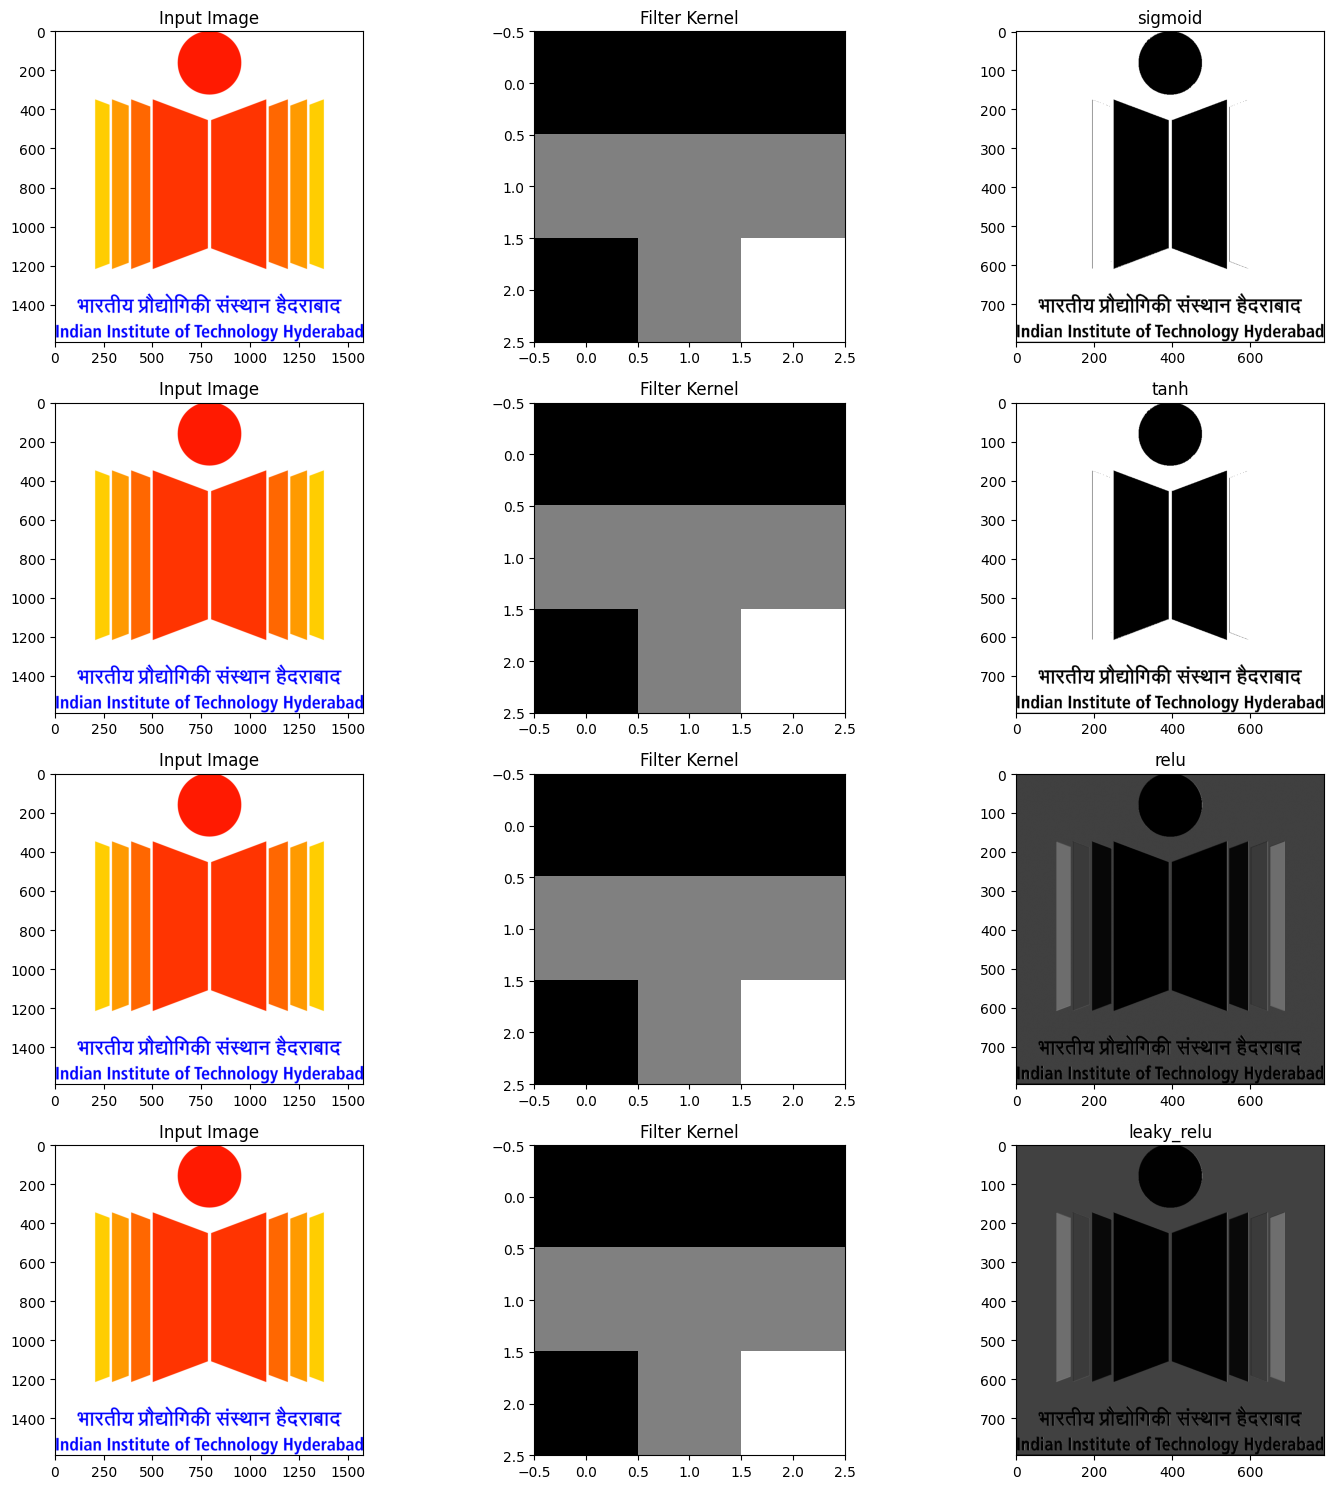

In [3]:
# Reading the image using OpenCV which reads image in BGR format.
image = cv2.imread('/content/logo.jpg')
# Converting to RGB format image.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initializing a random kernal of of 3*3 having 3 channels.
kernel = np.array([
    [[-1, -1, -1],
     [-1,  8, -1],
     [-1, -1, -1]],

    [[0, 0, 0],
     [0,  1, 0],
     [0, 0, 0]],

    [[-1, -1, -1],
     [0,  1, 0],
     [1, 1, 1]]
])


# Initialzing values for stride and padding.
stride = 2
padding = 1

# Initializing list of activation function to chcek
# how these functions works for our convolution opertaion.
activation_functions = ['sigmoid', 'tanh', 'relu', 'leaky_relu']

# PLotting the original image, kernals and output_activations.
plt.figure(figsize=(15, 15))

# Loop to call convolution operation for rach activation function.
for i, activation_name in enumerate(activation_functions, 1):
    # Calling the convolution function.
    output_activation = convolution(image, kernel, stride, padding, activation_name)

    # PLotting input image.
    plt.subplot(4, 3, 3*i - 2)
    plt.imshow(image, cmap='gray')
    plt.title('Input Image')

    # Plotting kernal.
    plt.subplot(4, 3, 3*i - 1)
    plt.imshow(kernel[:,:,0], cmap='gray')
    plt.title('Filter Kernel')

    # Plotting output activation.
    plt.subplot(4, 3, 3*i)
    plt.imshow(output_activation, cmap='gray')
    plt.title(activation_name)

plt.tight_layout()
plt.show()


# Problem 2: Pooling function

In [4]:
def pooling(input_map, pooling_function, stride, pool_size):
    """
    THis function performs pooling on the input activation map.

    Parameters:
    - input_map: Input activation map.
    - pooling_function: It tells about which operation is to be performed.
    - stride: Stride of the pooling operation.
    - pool_size: Size of the pooling window (integer).

    Returns:
    - pooled_map: Pooled activation map.
    """

    # Finding the dimensions of the input activation.
    input_height, input_width = input_map.shape

    # Calculating the dimensions of the pooled activation using formulas.
    pool_height = ((input_height - pool_size) // stride) + 1
    pool_width = ((input_width - pool_size) // stride) + 1

    # Inititializing the pooled activation of required height and width.
    pooled_map = np.zeros((pool_height, pool_width))

    # Iterating to find the correct pooling region and finding corresponding pooled value.
    # First loop iterate column and second loop iterated the row.
    for i in range(pool_height):
        for j in range(pool_width):
            # Finding starting and ending indices of the pool region.
            start_i = i * stride
            start_j = j * stride
            end_i = start_i + pool_size
            end_j = start_j + pool_size

            # Extracting the region to pool
            pool_region = input_map[start_i:end_i, start_j:end_j]
            # Appling pooling based on the selected region and using required function.
            if pooling_function == 'max':
                # Appling max pooling
                pooled_map[i, j] = np.max(pool_region)
            elif pooling_function == 'average':
                # Appling average pooling
                pooled_map[i, j] = np.average(pool_region)

    return pooled_map

<ipython-input-2-4650a73048df>:45: RuntimeWarning: overflow encountered in exp
  output_activation = 1 / (1 + np.exp(-output_activation))


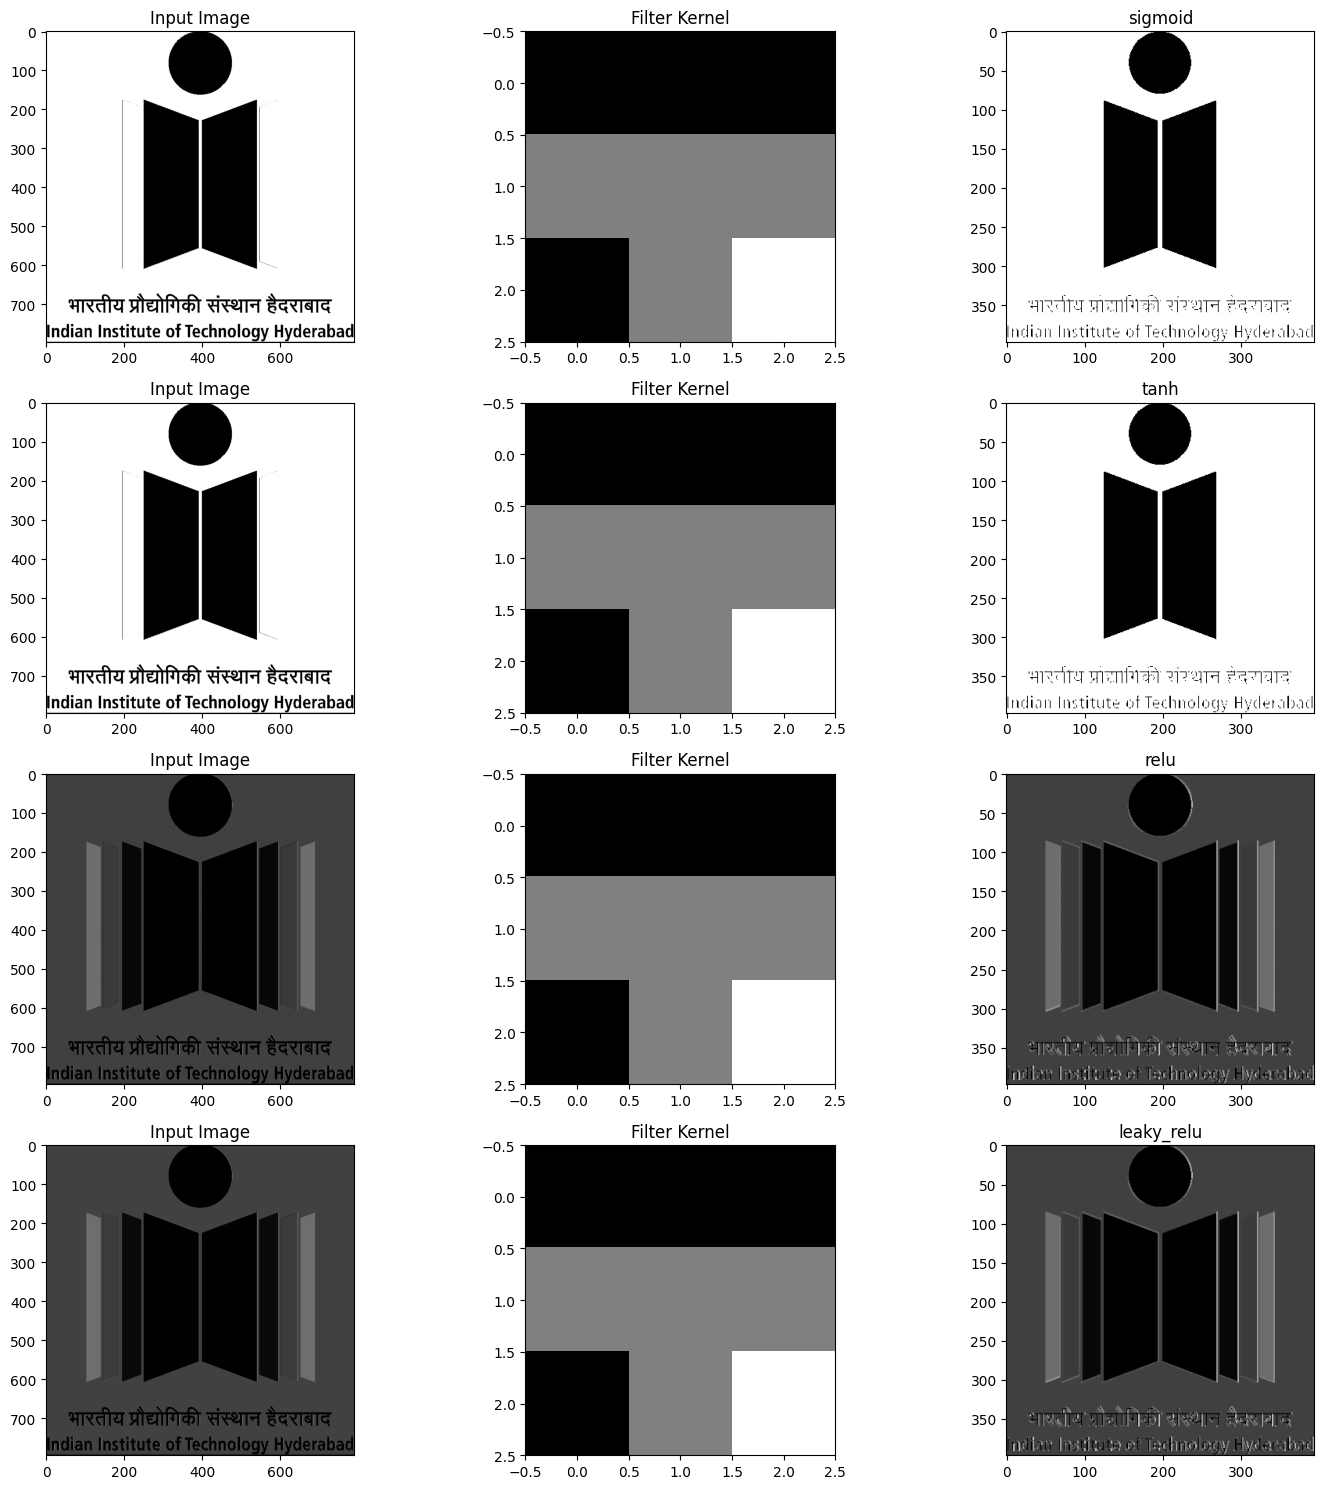

In [5]:
# Reading the image using OpenCV which reads image in BGR format.
image = cv2.imread('/content/logo.jpg')
# Converting to RGB format image.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initializing a random kernal of of 3*3 having 3 channels.
kernel = np.array([
    [[-1, -1, -1],
     [-1,  8, -1],
     [-1, -1, -1]],

    [[0, 0, 0],
     [0,  1, 0],
     [0, 0, 0]],

    [[-1, -1, -1],
     [0,  1, 0],
     [1, 1, 1]]
])

# Initialzing values for stride and padding.
stride = 2
padding = 1

# Initializing list of activation function to chcek
# how these functions works for our convolution opertaion.
activation_functions = ['sigmoid', 'tanh', 'relu', 'leaky_relu']

# PLotting the original image, kernals and output_activations.
plt.figure(figsize=(15, 15))

# Loop to call convolution operation for rach activation function.
for i, activation_name in enumerate(activation_functions, 1):
    # Calling the convolution function.
    output_activation = convolution(image, kernel, stride, padding, activation_name)

    # Specify pooling parameters
    pool_size = 4
    pool_stride = 2
    pooling_function = 'max'

    # Perform max pooling
    pooled_output = pooling(output_activation, pooling_function, pool_stride, pool_size)

    # PLotting input image.
    plt.subplot(4, 3, 3*i - 2)
    plt.imshow(output_activation, cmap='gray')
    plt.title('Input Image')

    # Plotting kernal.
    plt.subplot(4, 3, 3*i - 1)
    plt.imshow(kernel[:,:,0], cmap='gray')
    plt.title('Filter Kernel')

    # Plotting output activation.
    plt.subplot(4, 3, 3*i)
    plt.imshow(pooled_output, cmap='gray')
    plt.title(activation_name)

plt.tight_layout()
plt.show()

# Problem 3: Convolution layer

In [6]:
def convolution_layer(input_volume, num_filters, kernel_size, stride, padding, activation_function):

    """
    This function performs convolution operation on an image.

    Parameters:
    - input_volume: The input volume on which convolution operation is to be performed.
    - num_filters: The number of filters to be used in the convolution operation.
    - kernal_size: The dimension of the filter used in the convolution operation(list of two values).
    - stride: Stride of the convolution operation.
    - padding: padding to be used on the input_volume.
    - activation_function: activation function that is used during convolution operation.

    Returns:
    - output_activation: returns output activation after conolution operation.
    """
    # Finding the dimensions of the input volume and kernal.
    input_height, input_width, input_channels = input_volume.shape
    kernel_height, kernel_width = kernel_size

    # Adding padding if the value of padding is gerater then zero.
    if padding > 0:
        input_volume = np.pad(input_volume, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

    # Calculating the dimensions of the output activation using formulas.
    output_height = ((input_height - kernel_height + 2*padding) // stride) + 1
    output_width = ((input_width - kernel_width + 2*padding) // stride) + 1

    # Inititializing the output activation of required height, width, and depth.
    output_activation_volume = np.zeros((output_height, output_width, num_filters))

    # Generating random filter kernels
    np.random.seed(35)
    filters = np.random.randn(kernel_height, kernel_width, input_channels, num_filters)

    # Convolution
    for f in range(num_filters):
        for y in range(0, input_height - kernel_height + 1, stride):
            for x in range(0, input_width - kernel_width + 1, stride):
                # Extracting the volume of interest from the input volume
                selected_volume = input_volume[y:y+kernel_height, x:x+kernel_width, :]
                # Element wise multiplication between the selected_volume and filter weights.
                elementwise_multiplication = selected_volume * filters[:, :, :, f]
                # Summing the element wise multiplication results.
                output_activation = np.sum(elementwise_multiplication)
                # Assigning the output activation to the corresponding position in the output activation volume.
                output_activation_volume[y//stride, x//stride, f] = output_activation

    # Appling activation function after convolution operation.
    if activation_function == 'sigmoid':
        output_activation_volume = 1 / (1 + np.exp(-output_activation_volume))
    elif activation_function == 'tanh':
        output_activation_volume = np.tanh(output_activation_volume)
    elif activation_function == 'relu':
        output_activation_volume = np.maximum(0, output_activation_volume)
    elif activation_function == 'leaky_relu':
        output_activation_volume = np.maximum(0.01 * output_activation_volume, output_activation_volume)

    return output_activation_volume, filters


input_activation: (1590, 1579, 3)
kernal_size: (3, 3)
padding: 1
stride: 2
output_activation: (795, 790, 3)


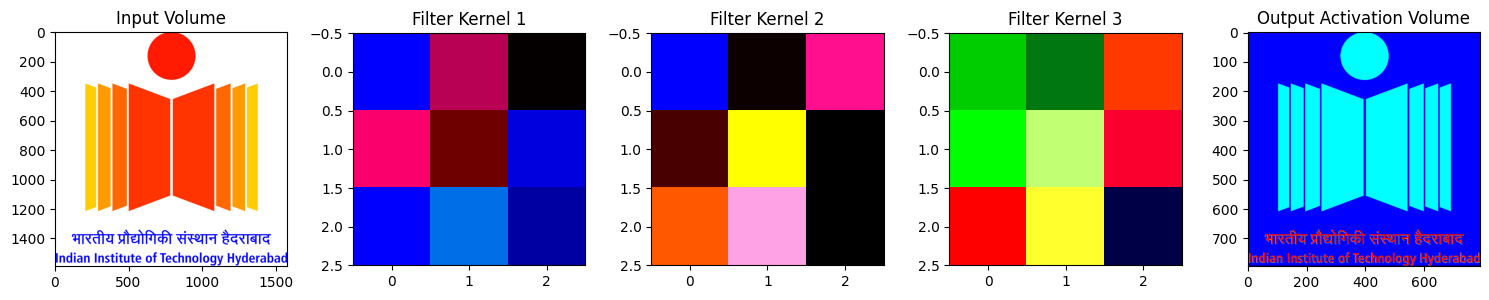

In [7]:
# Reading the image using OpenCV which reads image in BGR format.
image = cv2.imread('/content/logo.jpg')
# Converting to RGB format image.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initializing the parameters for the convolution layer.
num_filters = 3
kernal_size = (3, 3)
stride = 2
padding = 1
activation_function = 'leaky_relu'

# Performing convolution layer operation
output_activation_volume, filters = convolution_layer(image, num_filters, kernal_size, stride, padding, activation_function)

# Printing values to verify shape of output activation
print(f"input_activation: {image.shape}")
print(f"kernal_size: {kernal_size}")
print(f"padding: {padding}")
print(f"stride: {stride}")
print(f"output_activation: {output_activation_volume.shape}")

# PLotting the original image and output_activations.
plt.figure(figsize=(15, 5))

# Displaying the input volume.
plt.subplot(1, num_filters + 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Input Volume')

# Displaing filter kernels.
for f in range(num_filters):
    plt.subplot(1, num_filters + 2, f + 2)
    plt.imshow(filters[:, :, :, f], cmap='gray')
    plt.title(f'Filter Kernel {f+1}')

# Displaying output activation volume.
plt.subplot(1, num_filters + 2, num_filters + 2)
plt.imshow(output_activation_volume, cmap='gray')  # Displaying the first activation map
plt.title('Output Activation Volume')

plt.tight_layout()
plt.show()

**Output from code:**

input_activation: (1590, 1579, 3)

kernal_size: (3, 3)

padding: 1

stride: 2

output_activation: (795, 790, 3)

**Verification:**

output_activation_height = input_height - kernel_height + 2*padding) // stride + 1

output_activation_height = (1590 - 3 + 2) // 2 + 1 = 795

output_activation_width = input_width - kernel_width + 2*padding) // stride + 1

output_activation_width = (1579 - 3 + 2) // 2 + 1 = 790

depth = num_filters = 3

# Problem 4: Pooling layer

In [8]:
def pooling_layer(input_volume, pool_size, stride, pooling_function):

    """
    THis function performs pooling on the input activation map.

    Parameters:
    - input_volume: Input activation map.
    - pool_size: Size of the pooling window.
    - stride: Stride of the pooling operation.
    - pooling_function: It tells about which operation is to be performed.

    Returns:
    - pooled_map: Pooled activation map.
    """
    # Finding the dimensions of the input activation.
    input_height, input_width, num_maps = input_volume.shape

    # Calculating the dimensions of the pooled activation using formulas.
    pool_height = ((input_height - pool_size) // stride) + 1
    pool_width = ((input_width - pool_size) // stride) + 1

    # Inititializing the pooled activation of required height, width and depth.
    pooled_volume = np.zeros((pool_height, pool_width, num_maps))
    global_pooled_volume = np.zeros((num_maps))

    # Iterating to find the correct pooling region and finding corresponding pooled value.
    # First loop iterate column and second loop iterated the row.
    for k in range(num_maps):
        for i in range(pool_height):
            for j in range(pool_width):
                # Finding starting and ending indices of the pool region.
                start_i = i * stride
                start_j = j * stride
                end_i = start_i + pool_size
                end_j = start_j + pool_size

                # Extracting the volume to pool
                pool_region = input_volume[start_i:end_i, start_j:end_j, k]
                # Apply pooling based on the specified function
                if pooling_function == 'max':
                    pooled_volume[i, j, k] = np.max(pool_region)
                elif pooling_function == 'average':
                    pooled_volume[i, j, k] = np.mean(pool_region)
        global_pooled_volume[k] = np.mean(input_volume[:, :, k])

    if pooling_function == 'global_average':
        return global_pooled_volume
    else:
        return pooled_volume


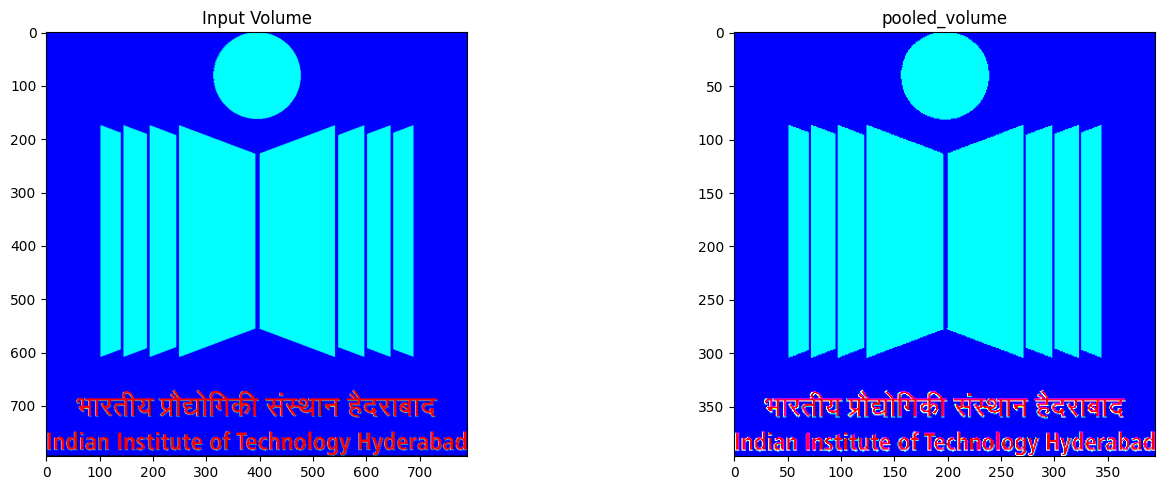

In [9]:
# Reading the image using OpenCV which reads image in BGR format.
image = cv2.imread('/content/logo.jpg')
# Converting to RGB format image.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initializing the parameters for the convolution layer.
num_filters = 3
kernal_size = (3, 3)
stride = 2
padding = 1
activation_function = 'leaky_relu'

# Performing convolution layer operation
output_activation_volume, filters = convolution_layer(image, num_filters, kernal_size, stride, padding, activation_function)

# Define pooling parameters
pool_size = 2
stride = 2
pooling_function = 'max'  # 'max', 'average', or 'global_average'

# Performing pooling layer operation.
pooled_volume = pooling_layer(output_activation_volume, pool_size, stride, pooling_function)

# Displaying results.
plt.figure(figsize=(15, 5))

# Displaying input volume to pooling layer.
plt.subplot(1, 2, 1)
plt.imshow(output_activation_volume, cmap='gray')
plt.title('Input Volume')

# Displaying pooled volume.
# Note: THe output of global average pooling cannot be displayed as it is a single vector.
plt.subplot(1, 2, 2)
plt.imshow(pooled_volume, cmap='gray')
plt.title('pooled_volume')

plt.tight_layout()
plt.show()

# Problem 5: Multilayer Perceptron (MLP) function:

In [10]:
# Function to calculate different activations and applying softmax.
def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

In [11]:
def mlp_function(input_vector, num_hidden_layers, hidden_sizes, activation_function, output_size, apply_softmax=False):

    # Initializing weights and biases
    input_size = input_vector.shape[0]
    weights = {}
    biases = {}

    # Initializing input to hidden layer weights and biases.
    weights['W1'] = np.random.randn(input_size, hidden_sizes[0])
    biases['b1'] = np.zeros((1, hidden_sizes[0]))

    # Initializing hidden to hidden layer weights and biases
    for i in range(2, num_hidden_layers + 1):
        weights[f'W{i}'] = np.random.randn(hidden_sizes[i-2], hidden_sizes[i-1])
        biases[f'b{i}'] = np.zeros((1, hidden_sizes[i-1]))

    # Initializing hidden to output layer weights and biases
    weights['W_output'] = np.random.randn(hidden_sizes[-1], output_size)
    biases['b_output'] = np.zeros((1, output_size))

    # Forward pass
    layer_output = input_vector
    for i in range(1, num_hidden_layers + 1):
        layer_output = activation_function(np.dot(layer_output, weights[f'W{i}']) + biases[f'b{i}'])

    output_vector = np.dot(layer_output, weights['W_output']) + biases['b_output']

    # Applying softmax if set true
    if apply_softmax:
        output_vector = softmax(output_vector)

    return output_vector

# Initalizing sample inputs
input_vector = np.array([1, 2, 3])
num_hidden_layers = 2
hidden_sizes = [4, 5]
output_size = 2

# Generating output vector without softmax
output_vector_no_softmax = mlp_function(input_vector, num_hidden_layers, hidden_sizes, relu, output_size, apply_softmax=False)
print("Output without softmax:", output_vector_no_softmax)

# Generating output vector with softmax
output_vector_with_softmax = mlp_function(input_vector, num_hidden_layers, hidden_sizes, relu, output_size, apply_softmax=True)
print("Output with softmax:", output_vector_with_softmax)


Output without softmax: [[-0.52537092 22.50835236]]
Output with softmax: [[0.00514759 0.99485241]]


#Problem 6: Putting-it all together(CNN)

In [12]:
# Defining the CNN architecture as per the requirements given in the question.
def cnn(input_image):

    # Initalizing input iamge size
    input_size = (224, 224, 3)

    # Convolution layer 1
    conv1_stride = 1
    conv1_padding = 0
    conv1_kernal_count = 16
    conv1_kernel_size = (5, 5)
    conv1_activation = 'relu'
    conv1_output, filters = convolution_layer(input_image,conv1_kernal_count, conv1_kernel_size, conv1_stride, conv1_padding, conv1_activation)

    # Max pooling layer 1
    pool1_size = 2
    pool1_stride = 2
    pool1_function = 'max'
    pool1_output = pooling_layer(conv1_output, pool1_size, pool1_stride, pool1_function)

    # Convolution layer 2
    conv2_stride = 2
    conv2_padding = 0
    conv2_kernal_count = 32
    conv2_kernel_size = (3, 3)
    conv2_activation = sigmoid
    conv2_output, filters = convolution_layer(pool1_output, conv2_kernal_count, conv2_kernel_size, conv2_stride, conv2_padding, conv2_activation)

    # Max pooling layer 2
    pool2_size = 2
    pool2_stride = 2
    pool2_function = 'max'
    pool2_output = pooling_layer(conv2_output, pool2_size, pool2_stride, pool2_function)

    # Global Average Pooling layer
    pool3_size = 2
    pool3_stride = 2
    pool3_function = 'global_average'
    gap_output = pooling_layer(pool2_output, pool3_size, pool3_stride, pool3_function)

    # MLP layer
    num_hidden_layers = 1
    hidden_sizes = [np.prod(gap_output.shape)]   # Size of hidden layer is same as input layer size
    print(hidden_sizes)
    activation_function = relu
    output_size = 1000
    mlp_output = mlp_function(gap_output, num_hidden_layers, hidden_sizes, activation_function, output_size, apply_softmax=True)

    return mlp_output

# Reading the image and resizing the image to 224x224 pixels.
image = cv2.imread('image.png')
image_resized = cv2.resize(image, (224, 224))
# Convert the image to RGB format.
input_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
#input_image = np.random.randn(224, 224, 3)
output_vector = cnn(input_image)
print("Output vector shape:", output_vector.shape)

[32]
Output vector shape: (1, 1000)


#problem 7: The adding problem (Elmon network, LSTM, and GRU)


In [13]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

np.random.seed(23)

def generate_sample():

    # randomly determining number of values in a sample data and then filling values.
    seq_length = np.random.randint(5, 9)
    sequence = np.zeros((seq_length, 2))
    random_values = np.random.uniform(1e-10, 0.9999999999, size=seq_length)

    # Choosing two random indices in the sequence to mark with 1 and assigning values.
    marked_indices = np.random.choice(seq_length, 2, replace=False)
    sequence[:, 0] = random_values

    # Computing value of y labels
    sequence[marked_indices, 1] = 1
    y = np.sum(sequence[:, 0] * sequence[:, 1])

    # returning data
    return sequence, y

def generate_dataset(num_samples):
    # Generating a list of data sample and returning it.
    dataset = [generate_sample() for _ in range(num_samples)]
    return dataset

# Processing data to use it for RNN models.
def preprocess_dataset(dataset):

    # Finding the maximum length of sequences in the dataset.
    max_length = max(len(sample[0]) for sample in dataset)
    # Initializing tensors to hold the dataset and labels with appropriate dimensions.
    tensor_dataset = torch.zeros((len(dataset), max_length, 2))
    tensor_labels = torch.zeros(len(dataset))

    # Iterating through each sample sequence.
    for i, (sample, label) in enumerate(dataset):
        length = len(sample)
        # Filling the tensor dataset
        tensor_dataset[i, :length, :] = torch.tensor(sample)
        tensor_labels[i] = label

    # Returning the preprocessed dataset
    return tensor_dataset, tensor_labels

In [14]:
# Defining Elman RNN
def elman_rnn(input_size, hidden_size):
    # Initializing weights for input-to-hidden, hidden-to-hidden, and biases for hidden layer.
    weight_ih = torch.randn(hidden_size, input_size, requires_grad=True)
    weight_hh = torch.randn(hidden_size, hidden_size, requires_grad=True)
    bias_h = torch.randn(hidden_size, requires_grad=True)

    # Returning weights
    return weight_ih, weight_hh, bias_h

# Training function for Elman RNN
def train_elman_rnn(weight_ih, weight_hh, bias_h, dataset, labels, num_epochs=10, learning_rate=0.001):

    losses = []

    # Loss function for Mean Squared Error and optimizer for updating weights.
    criterion = nn.MSELoss()
    optimizer = optim.SGD([weight_ih, weight_hh, bias_h], lr=learning_rate)

    # Iterating for number of epochs
    for epoch in range(num_epochs):
        total_loss = 0

        # Iterating for each sample of the dataset.
        for i in range(len(dataset)):
            sample = dataset[i]
            hidden_size = weight_hh.size(0)
            hidden = torch.zeros(hidden_size)

            # Iterating for each value in the sequence input and doing forward pass.
            for timestep in sample:
                input_t = torch.tensor(timestep, dtype=torch.float32)
                hidden = torch.tanh(torch.matmul(weight_ih, input_t) + torch.matmul(weight_hh, hidden) + bias_h)

            # Computing output and loss.
            output = hidden.sum()
            loss = criterion(output, labels[i])
            total_loss += loss.item()

            # Performing backward pass and updating gradient.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Calculating average loss and appending to list.
        avg_loss = total_loss / len(dataset)
        losses.append(avg_loss)

        if (epoch+1) % 2 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}')

    # Returning loss and weights.
    return losses, weight_ih, weight_hh, bias_h

# Testing function for Elman RNN
def test_elman_rnn(weight_ih, weight_hh, bias_h, dataset, labels):
    # Loss function for Mean Squared Error
    criterion = nn.MSELoss()
    total_loss = 0

    with torch.no_grad():
        # Iterating for each sample of the dataset.
        for i in range(len(dataset)):
            sample = dataset[i]
            hidden_size = weight_hh.size(0)
            hidden = torch.zeros(hidden_size)

            # Iterating for each value in the sequence input and doing forward pass.
            for timestep in sample:
                input_t = torch.tensor(timestep, dtype=torch.float32)
                hidden = torch.tanh(torch.matmul(weight_ih, input_t) + torch.matmul(weight_hh, hidden) + bias_h)

            # Computing output and loss.
            output = hidden.sum()
            loss = criterion(output, labels[i])
            total_loss += loss.item()

    avg_loss = total_loss / len(dataset)
    print(f'Testing Loss: {avg_loss}')
    return avg_loss

In [15]:
# Defining LSTM
def lstm(input_size, hidden_size):
    # Initializing weights and bias for all four gates input, forget, output, and cell update
    weight_ih = torch.randn(4 * hidden_size, input_size, requires_grad=True)
    weight_hh = torch.randn(4 * hidden_size, hidden_size, requires_grad=True)
    bias_ih = torch.randn(4 * hidden_size, requires_grad=True)
    bias_hh = torch.randn(4 * hidden_size, requires_grad=True)

    # Returning initialized parameters
    return weight_ih, weight_hh, bias_ih, bias_hh

def train_lstm(weight_ih, weight_hh, bias_ih, bias_hh, dataset, labels, num_epochs=10, learning_rate=0.01):
    # Loss function for Mean Squared Error and optimizer for updating weights.
    optimizer = optim.SGD([weight_ih, weight_hh, bias_ih, bias_hh], lr=learning_rate)
    losses = []
    criterion = nn.MSELoss()

    # Iterating for number of epochs
    for epoch in range(num_epochs):
        total_loss = 0

        # Iterating for each sample of the dataset.
        for i, sample in enumerate(dataset):
            hidden_size = weight_hh.size(0) // 4
            hidden = torch.zeros(hidden_size)
            cell = torch.zeros(hidden_size)

            # Iterating for each value in the sequence input and doing forward pass.
            for timestep in sample:
                input_t = torch.tensor(timestep, dtype=torch.float32)
                gates = torch.matmul(weight_ih, input_t) + bias_ih + torch.matmul(weight_hh, hidden) + bias_hh
                ingate, forgetgate, cellgate, outgate = gates.chunk(4)
                ingate = torch.sigmoid(ingate)
                forgetgate = torch.sigmoid(forgetgate)
                cellgate = torch.tanh(cellgate)
                outgate = torch.sigmoid(outgate)
                cell = forgetgate * cell + ingate * cellgate
                hidden = outgate * torch.tanh(cell)

            # Computing output and loss.
            output = hidden.sum()
            loss = criterion(output, labels[i])  # Compute loss using MSE loss function
            total_loss += loss.item()

            # Performing backward pass and updating gradient.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Calculating average loss and appending to list.
        avg_loss = total_loss / len(dataset)
        losses.append(avg_loss)

        if (epoch+1) % 2 == 0:
            print(f'LSTM Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}')

    # Returning loss and weights.
    return losses, weight_ih, weight_hh, bias_ih, bias_hh

def test_lstm(weight_ih, weight_hh, bias_ih, bias_hh, dataset, labels):

    # Loss function for Mean Squared Error
    criterion = nn.MSELoss()
    total_loss = 0

    with torch.no_grad():

        # Iterating for each sample of the dataset.
        for i, sample in enumerate(dataset):
            hidden_size = weight_hh.size(0) // 4
            hidden = torch.zeros(hidden_size)
            cell = torch.zeros(hidden_size)

            # Iterating for each value in the sequence input and doing forward pass.
            for timestep in sample:
                input_t = torch.tensor(timestep, dtype=torch.float32)
                gates = torch.matmul(weight_ih, input_t) + bias_ih + torch.matmul(weight_hh, hidden) + bias_hh
                ingate, forgetgate, cellgate, outgate = gates.chunk(4)
                ingate = torch.sigmoid(ingate)
                forgetgate = torch.sigmoid(forgetgate)
                cellgate = torch.tanh(cellgate)
                outgate = torch.sigmoid(outgate)
                cell = forgetgate * cell + ingate * cellgate
                hidden = outgate * torch.tanh(cell)

            # Computing output and loss.
            output = hidden.sum()
            loss = criterion(output, labels[i])
            total_loss += loss.item()

    # Calculating average loss and appending to list.
    avg_loss = total_loss / len(dataset)
    print(f'Testing Loss: {avg_loss}')
    return avg_loss


In [16]:
# Defining GRU
def gru(input_size, hidden_size):
    # Initializing weights and bias for all three gates input, forget, output, and cell update.
    weight_ih = torch.randn(3 * hidden_size, input_size, requires_grad=True)
    weight_hh = torch.randn(3 * hidden_size, hidden_size, requires_grad=True)
    bias_ih = torch.randn(3 * hidden_size, requires_grad=True)
    bias_hh = torch.randn(3 * hidden_size, requires_grad=True)

    # Returning initialized parameters
    return weight_ih, weight_hh, bias_ih, bias_hh


def train_gru(weight_ih, weight_hh, bias_ih, bias_hh, dataset, labels, num_epochs=10, learning_rate=0.01):

    # Loss function for Mean Squared Error and optimizer for updating weights.
    optimizer = optim.SGD([weight_ih, weight_hh, bias_ih, bias_hh], lr=learning_rate)
    losses = []
    criterion = nn.MSELoss()

    # Iterating for number of epochs
    for epoch in range(num_epochs):
        total_loss = 0

        # Iterating for each sample of the dataset.
        for i, sample in enumerate(dataset):
            hidden_size = weight_hh.size(0) // 3
            hidden = torch.zeros(hidden_size)

            # Iterating for each value in the sequence input and doing forward pass.
            for timestep in sample:
                input_t = torch.tensor(timestep, dtype=torch.float32)
                gi = torch.matmul(weight_ih, input_t) + bias_ih
                gh = torch.matmul(weight_hh, hidden) + bias_hh
                i_r, i_i, i_n = gi.chunk(3)
                h_r, h_i, h_n = gh.chunk(3)
                resetgate = torch.sigmoid(i_r + h_r)
                inputgate = torch.sigmoid(i_i + h_i)
                newgate = torch.tanh(i_n + resetgate * h_n)
                hidden = newgate + inputgate * (hidden - newgate)

            # Computing output and loss.
            output = hidden.sum()
            loss = criterion(output, labels[i])
            total_loss += loss.item()

            # Performing backward pass and updating gradient.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Calculating average loss and appending to list.
        avg_loss = total_loss / len(dataset)
        losses.append(avg_loss)

        if (epoch+1) % 2 == 0:
            print(f'GRU Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}')
    # Returning loss and weights.
    return losses, weight_ih, weight_hh, bias_ih, bias_hh

def test_gru(weight_ih, weight_hh, bias_ih, bias_hh, dataset, labels):

    # Loss function for Mean Squared Error
    criterion = nn.MSELoss()
    total_loss = 0

    with torch.no_grad():

        # Iterating for each sample of the dataset.
        for i, sample in enumerate(dataset):
            hidden_size = weight_hh.size(0) // 3
            hidden = torch.zeros(hidden_size)

            # Iterating for each value in the sequence input and doing forward pass.
            for timestep in sample:
                input_t = torch.tensor(timestep, dtype=torch.float32)
                gi = torch.matmul(weight_ih, input_t) + bias_ih
                gh = torch.matmul(weight_hh, hidden) + bias_hh
                i_r, i_i, i_n = gi.chunk(3)
                h_r, h_i, h_n = gh.chunk(3)
                resetgate = torch.sigmoid(i_r + h_r)
                inputgate = torch.sigmoid(i_i + h_i)
                newgate = torch.tanh(i_n + resetgate * h_n)
                hidden = newgate + inputgate * (hidden - newgate)

            # Computing output and loss.
            output = hidden.sum()
            loss = criterion(output, labels[i])
            total_loss += loss.item()

    avg_loss = total_loss / len(dataset)
    print(f'Testing Loss: {avg_loss}')
    return avg_loss


In [18]:
# Main function
if __name__ == "__main__":
    # Generating dataset
    train_data = generate_dataset(5000)
    test_data = generate_dataset(1000)

    # Preprocessing dataset
    train_dataset, train_labels = preprocess_dataset(train_data)
    test_dataset, test_labels = preprocess_dataset(test_data)

    # Defining Elman RNN
    input_size = 2
    hidden_size = 64
    weight_ih, weight_hh, bias_h = elman_rnn(input_size, hidden_size)

    # Training Elman RNN
    print("Training Elman RNN...")
    elman_losses, weight_iht, weight_hht, bias_ht = train_elman_rnn(weight_ih, weight_hh, bias_h, train_dataset, train_labels)

    # Testing Elman RNN
    print("Testing Elman RNN...")
    test_loss_elman = test_elman_rnn(weight_iht, weight_hht, bias_ht, test_dataset, test_labels)

    # Defining LSTM
    input_size = 2
    hidden_size = 64
    weight_ih, weight_hh, bias_ih, bias_hh = lstm(input_size, hidden_size)

    # Training LSTM
    print("Training LSTM...")
    lstm_losses, weight_iht, weight_hht, bias_iht, bias_hht, = train_lstm(weight_ih, weight_hh, bias_ih, bias_hh, train_dataset,train_labels)

    # Testing LSTM
    print("Testing LSTM...")
    test_loss_lstm = test_lstm(weight_iht, weight_hht, bias_iht, bias_hht, test_dataset, test_labels)

    # Defining GRU
    input_size = 2
    hidden_size = 64
    weight_ih, weight_hh, bias_ih, bias_hh = gru(input_size, hidden_size)

    # Training GRU
    print("Training GRU...")
    gru_losses, weight_iht, weight_hht, bias_iht, bias_hht = train_gru(weight_ih, weight_hh, bias_ih, bias_hh, train_dataset,train_labels)

    # Testing GRU
    print("Testing GRU...")
    test_loss_gru = test_gru(weight_iht, weight_hht, bias_iht, bias_hht, test_dataset, test_labels)

    # Calculating baseline loss
    total_diff = 0
    dataset_size = len(train_data)
    for sample, label in zip(train_data, train_labels):
        total_diff += abs(label - 1)

    average_diff = total_diff / dataset_size
    baseline_losses = [average_diff]*10

    # Calculating baseline loss on test data
    total_diff = 0
    dataset_size = len(test_data)
    for sample, label in zip(test_data, test_labels):
        total_diff += abs(label - 1)

    baseline_loss_test = total_diff / dataset_size

Training Elman RNN...


<ipython-input-14-7dc57f9916cc>:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_t = torch.tensor(timestep, dtype=torch.float32)


Epoch [2/10], Loss: 0.18051586867994904
Epoch [4/10], Loss: 0.14415123188786136
Epoch [6/10], Loss: 0.13404311928360577
Epoch [8/10], Loss: 0.12987850758548816
Epoch [10/10], Loss: 0.11279013449242052
Testing Elman RNN...
Testing Loss: 0.10959428071827108
Training LSTM...


<ipython-input-14-7dc57f9916cc>:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_t = torch.tensor(timestep, dtype=torch.float32)
<ipython-input-15-abd9f646c172>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_t = torch.tensor(timestep, dtype=torch.float32)


LSTM Epoch [2/10], Loss: 0.03650694637768885
LSTM Epoch [4/10], Loss: 0.015657150869855745
LSTM Epoch [6/10], Loss: 0.00995936272083148
LSTM Epoch [8/10], Loss: 0.007376486334814504
LSTM Epoch [10/10], Loss: 0.005905871145915903
Testing LSTM...


<ipython-input-15-abd9f646c172>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_t = torch.tensor(timestep, dtype=torch.float32)


Testing Loss: 0.006168956765017258
Training GRU...


<ipython-input-16-0ca9af574562>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_t = torch.tensor(timestep, dtype=torch.float32)


GRU Epoch [2/10], Loss: 0.040123194504117415
GRU Epoch [4/10], Loss: 0.02125335534415786
GRU Epoch [6/10], Loss: 0.013351623755117422
GRU Epoch [8/10], Loss: 0.00995273710792483
GRU Epoch [10/10], Loss: 0.00799485583738622
Testing GRU...


<ipython-input-16-0ca9af574562>:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_t = torch.tensor(timestep, dtype=torch.float32)


Testing Loss: 0.007360662243592305


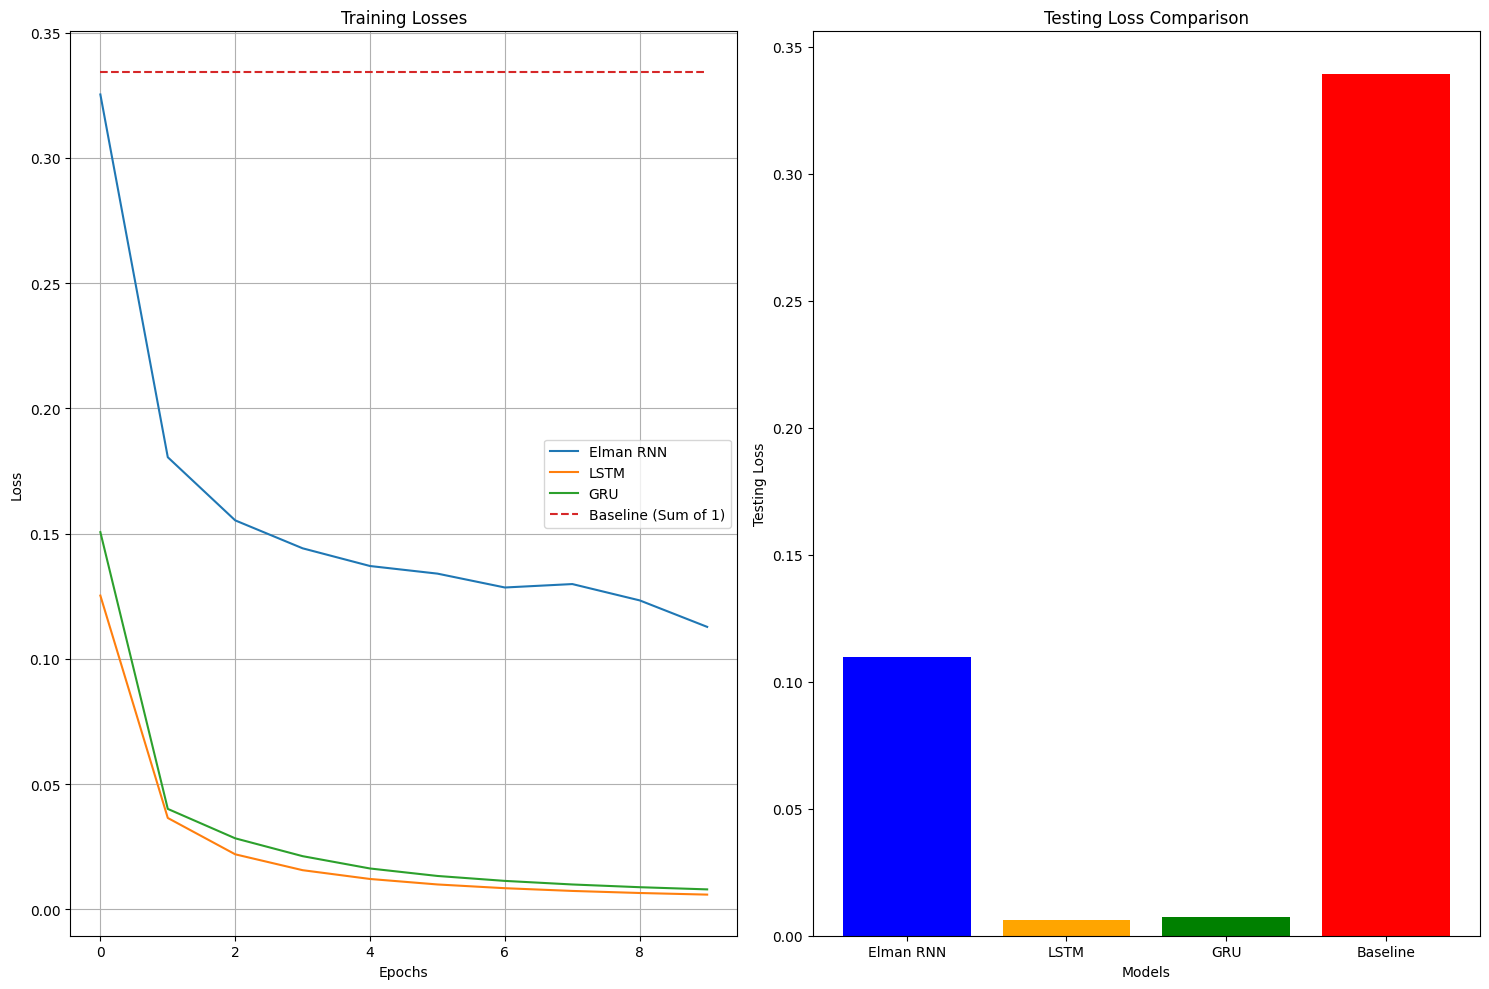

In [22]:
# Plotting learning curves and testing loss comparison as subplots
plt.figure(figsize=(15, 10))

# Subplot for learning curves
plt.subplot(1, 2, 1)
plt.plot(elman_losses, label='Elman RNN')
plt.plot(lstm_losses, label='LSTM')
plt.plot(gru_losses, label='GRU')
plt.plot(baseline_losses, label='Baseline (Sum of 1)', linestyle='--')
plt.title('Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Subplot for testing loss comparison
plt.subplot(1, 2, 2)
models = ['Elman RNN', 'LSTM', 'GRU', 'Baseline']
testing_losses = [test_loss_elman, test_loss_lstm, test_loss_gru, baseline_loss_test]
plt.bar(models, testing_losses, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Testing Loss')
plt.title('Testing Loss Comparison')

plt.tight_layout()
plt.show()